# Overview of seaborn plotting functions

씨본과 상호작용하는 대부분의 작업은 일련의 플로팅 함수를 통해 이루어집니다. 튜토리얼의 이후 장에서는 각 함수가 제공하는 특정 기능을 살펴보겠습니다. 이 장에서는 여러분이 만나게 될 다양한 종류의 함수를 개략적으로 소개합니다.

# Similar functions for similar tasks

씨본 네임스페이스는 평평하며, 모든 기능은 최상위 수준에서 액세스할 수 있습니다. 그러나 코드 자체는 계층적으로 구조화되어 있으며, 서로 다른 방법으로 유사한 시각화 목표를 달성하는 기능 모듈로 구성되어 있습니다. 대부분의 문서는 이러한 모듈을 중심으로 구성되어 있습니다. '관계형', '분포형', '범주형' 등의 이름을 볼 수 있습니다.

예를 들어, 분포 모듈은 데이터포인트의 분포를 표현하는 데 특화된 함수를 정의합니다. 여기에는 히스토그램과 같은 친숙한 메서드가 포함됩니다.

In [4]:
import seaborn as sns
sns.set_theme()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

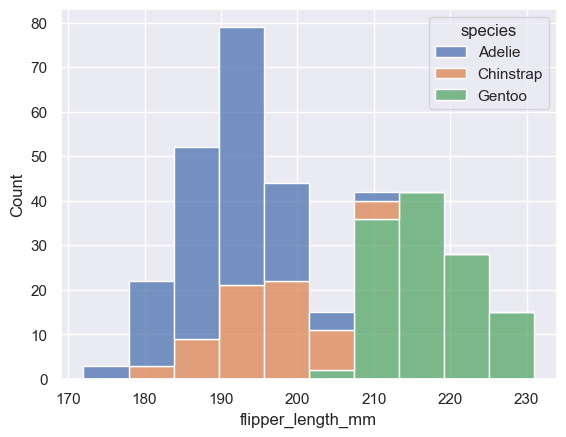

In [2]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

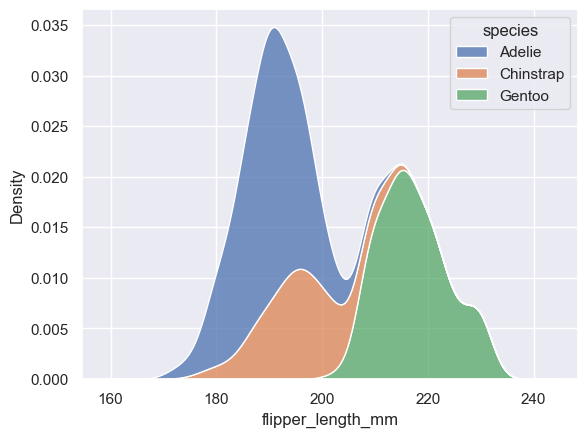

In [3]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

모듈 내의 함수는 많은 기본 코드를 공유하며 라이브러리의 다른 구성 요소에는 없을 수 있는 유사한 기능을 제공합니다(예: 위 예제에서 multiple="stack"). 이러한 함수는 데이터 집합을 탐색할 때 서로 다른 시각적 표현 간에 쉽게 전환할 수 있도록 설계되었습니다. 서로 다른 표현은 종종 상호 보완적인 장단점을 가지고 있기 때문입니다.

# Figure-level vs. axes-level functions

다양한 모듈 외에도 해상 함수를 '축 수준' 또는 '그림 수준'으로 분류하는 교차 절단 분류가 있습니다. 위의 예는 축 수준 함수입니다. 이 함수는 함수의 반환 값인 단일 matplotlib.pyplot.Axes 객체에 데이터를 플롯합니다.

이와 대조적으로, 그림 수준 함수는 그림을 관리하는 시본 객체(일반적으로 FacetGrid)를 통해 matplotlib와 인터페이스합니다. 각 모듈에는 단일 그림 수준 함수가 있으며, 이 함수는 다양한 축 수준 함수에 대한 단일 인터페이스를 제공합니다. 조직은 다음과 같이 생겼습니다.

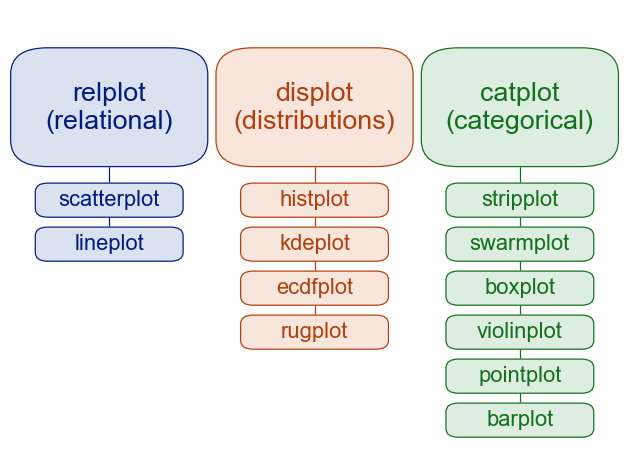

예를 들어, displot()은 분포 모듈의 그림 수준 함수입니다. 이 함수의 기본 동작은 히스토그램을 그리는 것으로, 백그라운드에서 histplot()과 동일한 코드를 사용합니다.

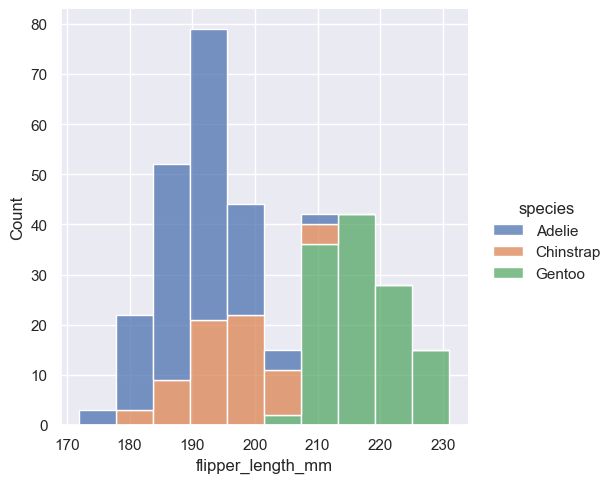

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

대신 커널 밀도 플롯을 그리려면 kdeplot()과 동일한 코드를 사용하여 kind 매개 변수를 사용하여 선택합니다:

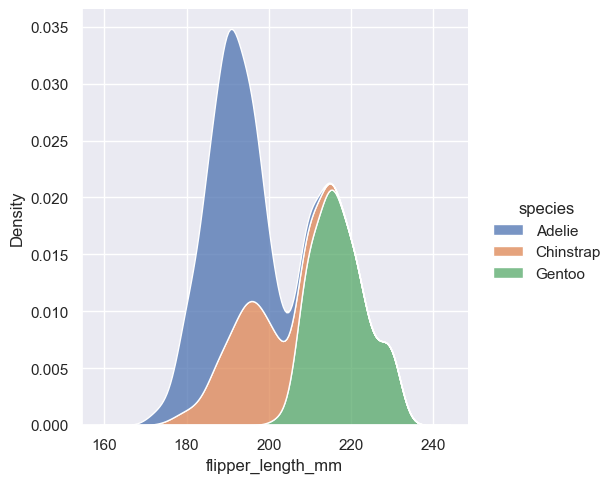

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

그림 수준 플롯은 축 수준 플롯과 대부분 비슷해 보이지만 몇 가지 차이점이 있음을 알 수 있습니다. 특히 범례가 플롯 외부에 배치되어 있습니다. 또한 모양이 약간 다릅니다(곧 자세히 설명합니다).

그림 수준 함수가 제공하는 가장 유용한 기능은 여러 개의 하위 플롯이 있는 그림을 쉽게 만들 수 있다는 것입니다. 예를 들어, 각 펭귄 종에 대한 세 가지 분포를 같은 축에 쌓는 대신 그림의 열에 걸쳐 각 분포를 플롯하여 '패싯'할 수 있습니다:

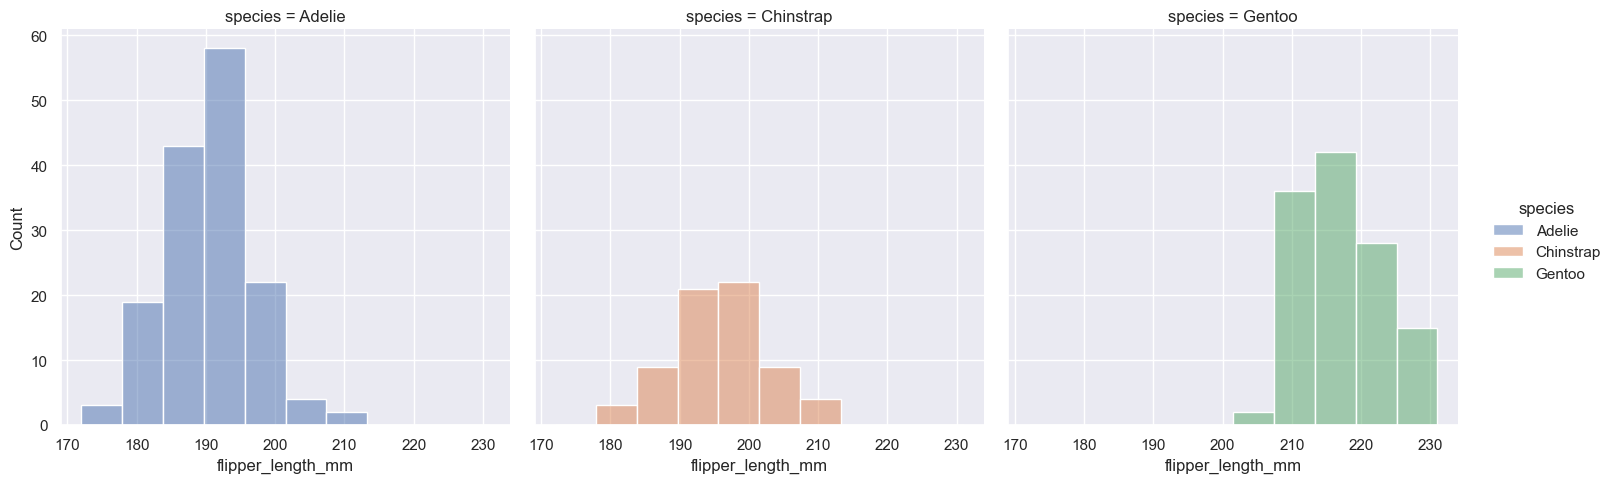

In [8]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

그림 수준 함수는 축 수준 함수를 래핑하고 종류별 키워드 인수(예: 히스토그램의 구간차원 크기)를 기본 함수로 전달합니다. 즉, 유연성은 떨어지지 않지만, 종류별 매개변수가 함수 서명이나 문서 문자열에 나타나지 않는다는 단점이 있습니다. 일부 기능은 검색하기 어려울 수 있으며, 특정 목표를 달성하는 방법을 이해하기 전에 두 페이지의 다른 설명서를 살펴봐야 할 수도 있습니다.

# Axes-level functions make self-contained plots

축 수준 함수는 matplotlib 함수의 드롭인 대체 함수처럼 작동하도록 작성되었습니다. 축 레이블과 범례를 자동으로 추가하지만, 그려지는 축 외에는 아무것도 수정하지 않습니다. 즉, 예측 가능한 결과를 가진 임의의 복잡한 matplotlib 그림으로 구성할 수 있습니다.

축 수준 함수는 내부적으로 matplotlib 상태 머신 인터페이스에 연결하여 "현재 활성" 축에 플롯을 그리도록 matplotlib.pyplot.gca()를 호출합니다. 그러나 이 함수는 객체 지향 인터페이스와 통합되어 각 플롯의 위치를 정확히 지정할 수 있는 ax= 인수를 추가로 허용합니다.

In [9]:
import matplotlib.pyplot as plt

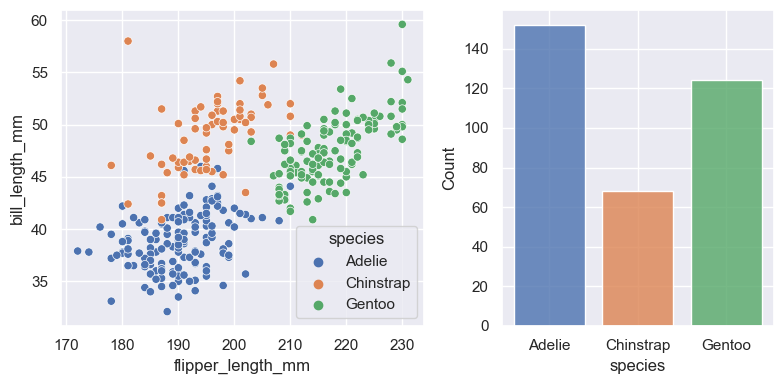

In [18]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()